In [60]:
# To enable plotting graphs in Jupyter Notebook

%matplotlib inline

In [9]:
import pandas as pd
import numpy as np

#import linear regression machine learning library

from sklearn.linear_model import LinearRegression

car_df = pd.read_csv("imports-85.data", names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'])


In [10]:
car_df.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


# Objective of Linear Regression: To predict the price of the car.

In [11]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [12]:
# Step 2: Dropping columns that have low variance (e.g. if 'fuel' only indicates 'gas'; the variance is very low and there is 
# no impact on the dependent variable by this attribute) For such columns (with limited variance, such as Gender (male or female)
# we should create dummy_variables )
# 'make': different makes in the same dataset may not be a good idea.
car_df = car_df.drop('make', axis=1) #axis = 1 : To drop label

# dropping the following columns due to low variance--i.e. doing low variance filter. i.e. an attribute which is mostly one type of data is not a good dimension.
car_df = car_df.drop('fuel_type', axis=1)
car_df = car_df.drop('engine_location', axis=1)
car_df = car_df.drop('num_of_doors', axis=1)
car_df = car_df.drop('body_style', axis=1)
car_df = car_df.drop('drive_wheels', axis=1)
car_df = car_df.drop('engine_type', axis=1)
car_df = car_df.drop('fuel_system', axis=1)
car_df = car_df.drop('aspiration', axis=1)
car_df = car_df.drop('normalized_losses', axis=1)

In [13]:
# Step 3: Converting everything into numbers ('object', 'string' into 'int', 'float')

car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [14]:
# step 4: Replacing string numbers into numerical values for numberof cylinders

car_df['cylinder'] = car_df['num_of_cylinders'].replace({
    'one': 1,
    'two': 2,
    'three': 3,
    'four':  4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'twelve': 12
})

In [15]:
# Step 5: Displaying and Replacing 'invalid' values with 'NA'

# replacing '?' with 'NA' which is the equivalent of Null
# NAN = Not A Number
car_df = car_df.replace('?', np.nan)

# Displaying records with 'NA'

car_df[car_df.isnull().any(axis=1)].head().transpose()

,9,44,45,55,56
symboling,0,1,0,3,3
wheel_base,99.5,94.5,94.5,95.3,95.3
length,178.2,155.9,155.9,169,169
width,67.9,63.6,63.6,65.7,65.7
height,52,52,52,49.6,49.6
curb_weight,3053,1874,1909,2380,2380
num_of_cylinders,five,four,four,two,two
engine_size,131,90,90,70,70
bore,3.13,3.03,3.03,NaN,NaN
stroke,3.40,3.11,3.11,NaN,NaN


In [16]:
# step 5: Change the attribute types from 'object' to 'float' type-i.e. generic numeric type

car_df['bore'] =  car_df['bore'].astype('float64')
car_df['stroke'] = car_df['stroke'].astype('float64')
car_df['horsepower'] = car_df['horsepower'].astype('float64')
car_df['peak_rpm'] = car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')

car_df['cylinder'] = car_df['cylinder'].astype('int64') #not required

In [17]:
# Step 6: Imputation
#fill up NaN is numeric columns with median values of those columns respectively
# For example some numerical columns in this dataset have the value '?'
car_df['bore'] = car_df['bore'].fillna(car_df['bore'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['price'] = car_df['price'].fillna(car_df['price'].median())


In [18]:
# Step 7: Doing basic statistics: Looking at statistical summary

car_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


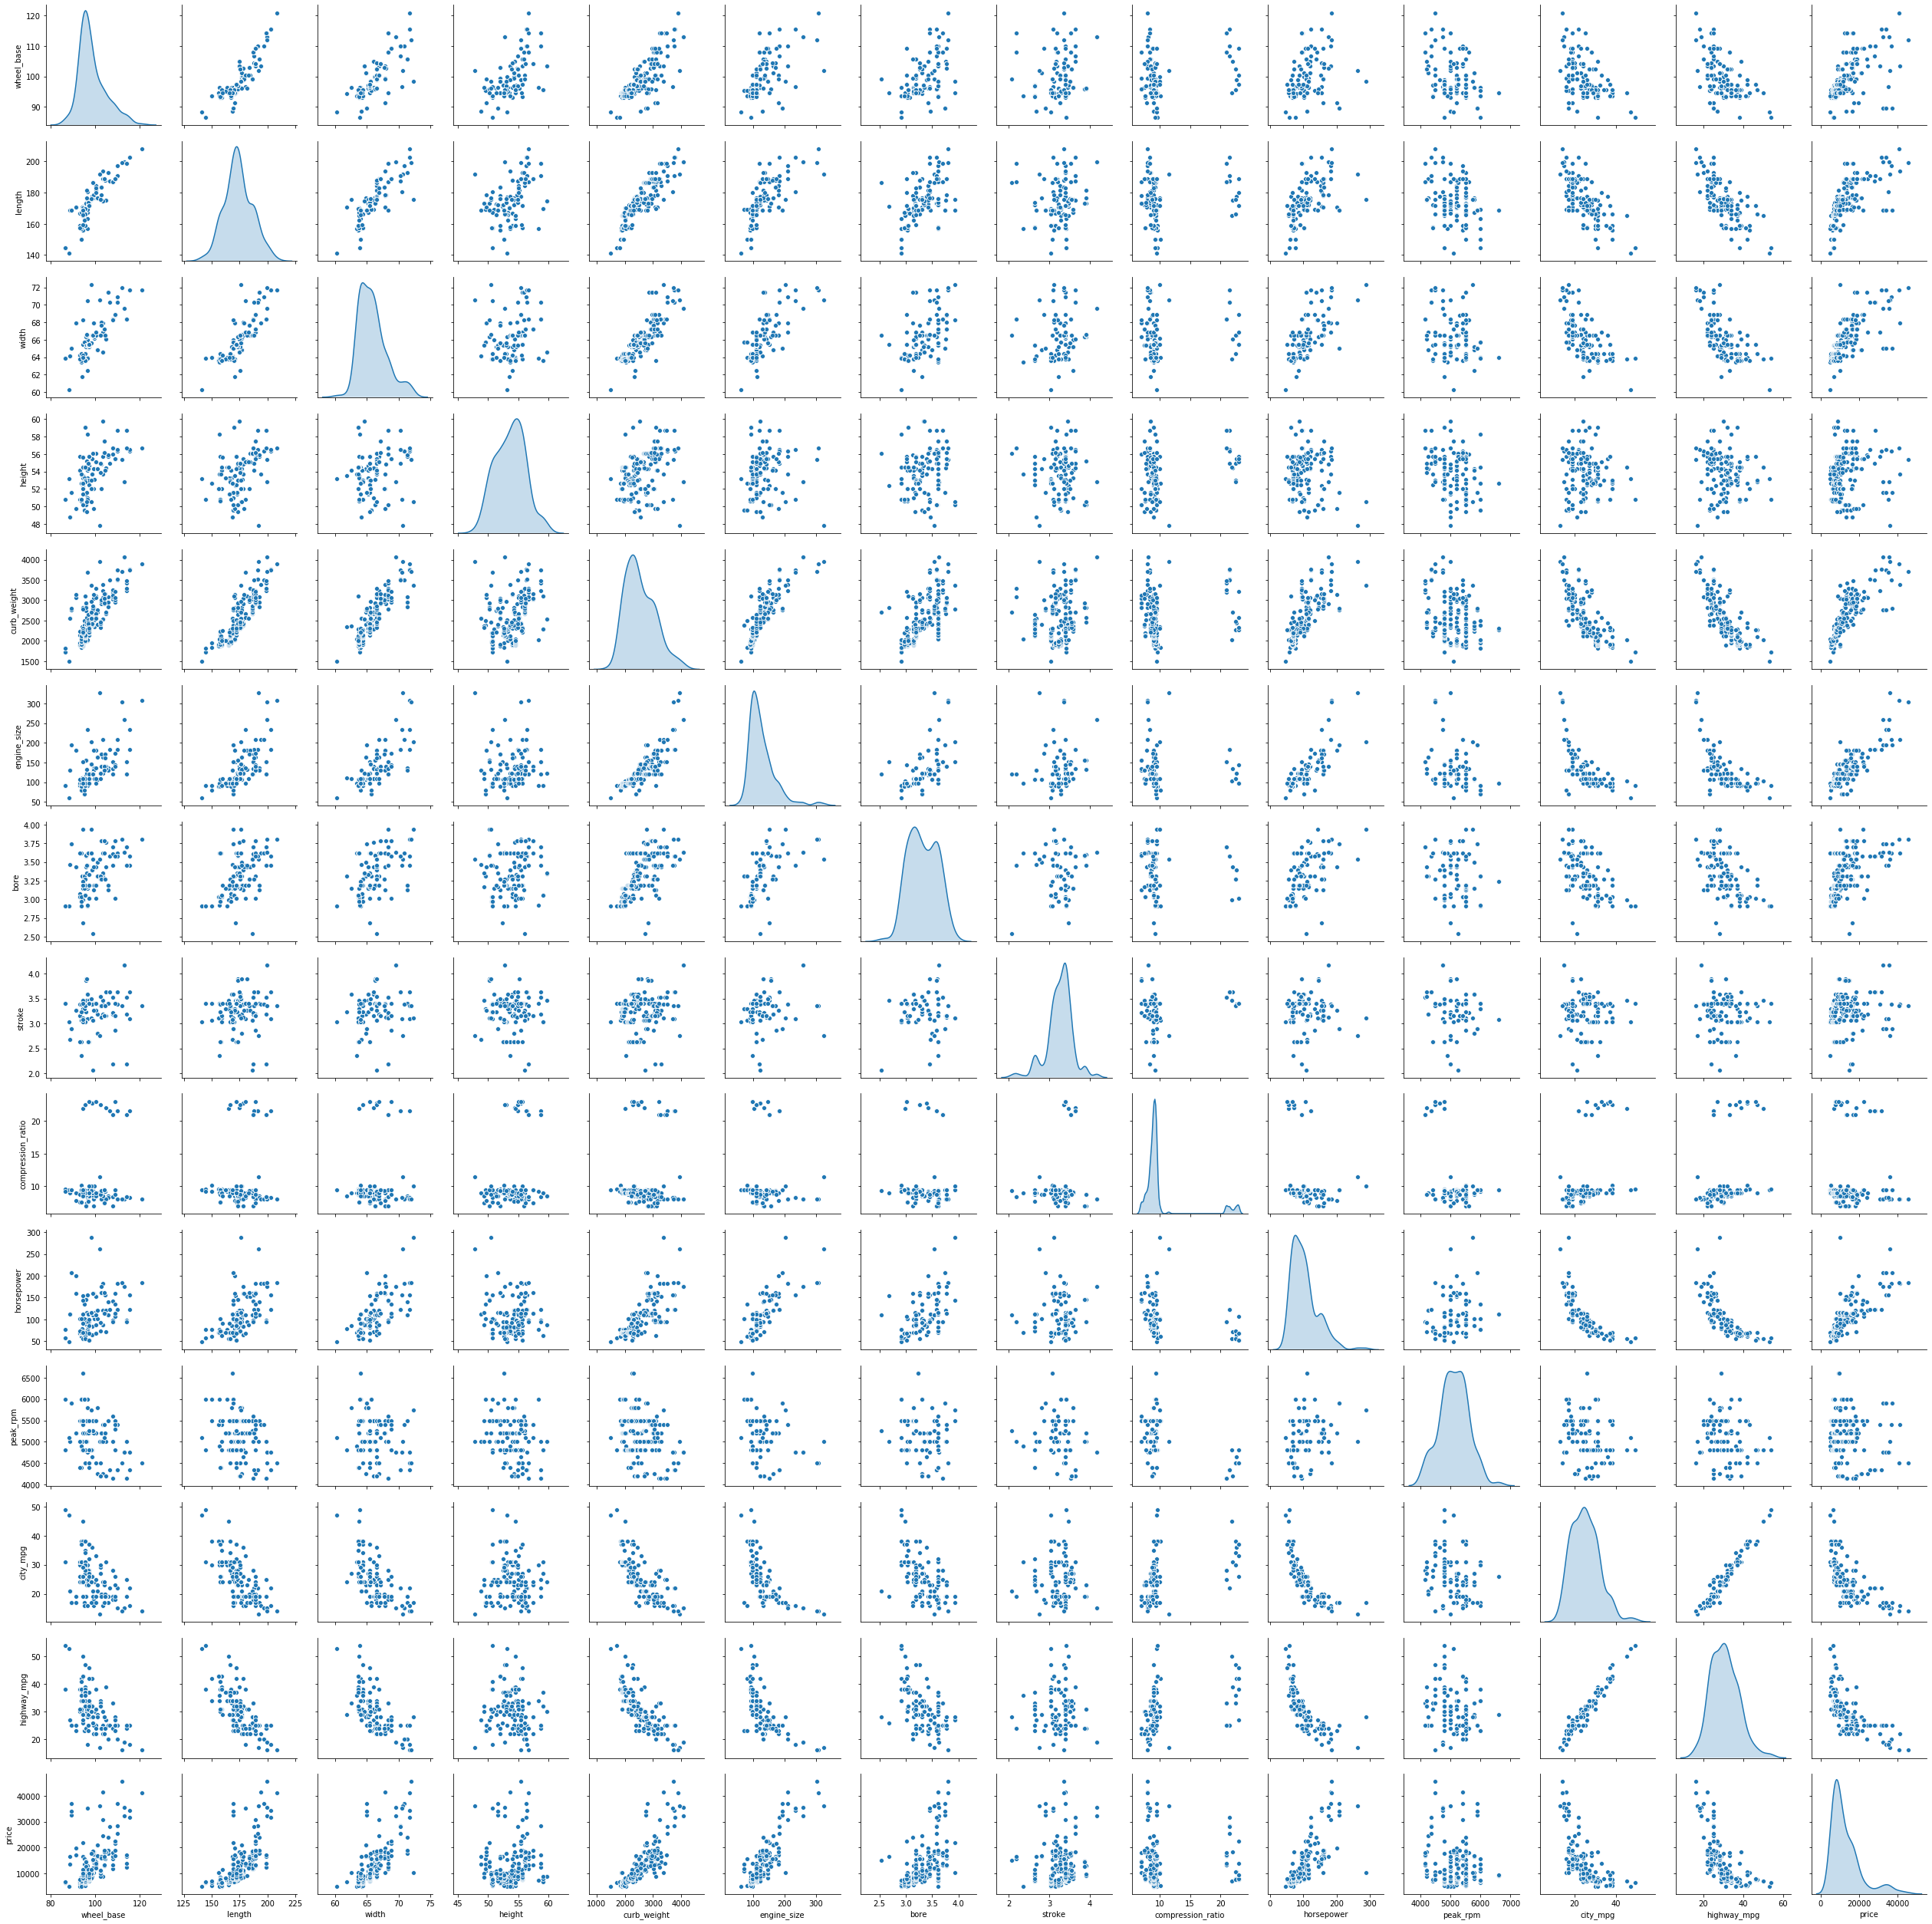

In [20]:
# Running the first statistical analysis; Controlling how variables interact with one another i.e. using 'Pair-Plots' 

import seaborn as sns

# step 1: specify rows and columns for the analysis
# here we'll take all columns and columns 1-16 to exclude the 'Price' column which is our dependent variable

car_df_attr = car_df.iloc[ : , 1:16] # excluding the dependent variable--i.e. 17th column

#plotting all columns & rows excep price to check their interaction with each other

sns.pairplot(car_df_attr, diag_kind = 'kde')

#'kde' command gives us the 'distribution of data for each column'. Otherwise the diagonal array will show the scatterplot
# of each colum with itself which is a straight line and is useless (i.e. both axes will reflect the same data points)

# Analyzing 'Pairplots'


### Points to keep in mind:
#### 1. first row & column are the same, same goes for second row and second column, and so on.
#### 2. by using 'diag_kind = 'kde'' we can see the distribution of the datapoints in each column.


### The pair plots show some relation between price and hight, curb weight, eingine size, number of cylinders, horsepower, and inversely related to mpg

    ####In this context a decision tree or linear regression could be a good start.

In [21]:
# Step 1. Dropping the "price" column because it's the target and creating a new data frame called X

X = car_df.drop('price', axis=1)

# Next we'll drop 'number_of_cylinders' because it's a low-variance column

X = X.drop('num_of_cylinders', axis=1)

# Next we'll set the target variable 'price' equal to 'y'

y = car_df[['price']]


In [22]:
# Step 2: creating training and testing datasets from the x & y dataframes. 
# We'll use 'Sklearn' package's data splitting function which is based on random functions.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# The output of the above function will be FOUR datasets.




In [23]:
# invoke the Linear Regression Function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# printing the coefficients for each of the independent variables

for idx, col_name in enumerate(X_train.columns): 
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    

### for every 1 unit increase in "symboling" the price increases by 88.578 units.

The coefficient for symboling is 88.57794900973279
The coefficient for wheel_base is 71.82402760934701
The coefficient for length is -93.38447872011889
The coefficient for width is 479.8164355926815
The coefficient for height is 315.20384001212176
The coefficient for curb_weight is -0.8657326891351541
The coefficient for engine_size is 251.7436258279207
The coefficient for bore is -6832.550987635426
The coefficient for stroke is -5085.818859790595
The coefficient for compression_ratio is 335.7682519296409
The coefficient for horsepower is -0.038987961312704496
The coefficient for peak_rpm is 2.4300494935823354
The coefficient for city_mpg is -201.81713200347318
The coefficient for highway_mpg is -41.93431935731779
The coefficient for cylinder is -3176.176090372966


In [27]:
# Let's check the model's intercept as well

intercept = regression_model.intercept_[0]
intercept

-12323.060174569484